In [259]:
# Senior Design 2, Fall 2019 @ CCNY
# Team Member & Name: Team 5 (4 member team)

# PRAVEENA SHRESTHA 
# ABDUR RAFEY
# STANLEY WONG
# JOHN CHEN

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import warnings
%matplotlib inline

In [4]:
train_df = pd.read_csv('dnc_complaint_numbers_2019-11-25.csv', index_col=0)
test_df = pd.read_csv('dnc_complaint_numbers_2019-10-21.csv', index_col=0)
submit1_df = pd.read_csv('dnc_complaint_numbers_2019-11-11.csv', index_col=0)


In [5]:
# Array using Consumer_States Provided
StateArray = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia',
             'Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland',
             'Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey',
             'New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island',
             'South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming',
              'Ontario, Canada','District of Columbia','Virgin Islands','Puerto Rico','Northern Mariana Islands','US Military Pacific']

# Array corresponding Consumer_State number 
CorrStateNum = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,20,
               21,22,23,24,25,26,27,28,29,30,
               31,32,33,34,35,36,37,38,39,40,
               41,42,43,44,45,46,47,48,49,50,
                51,52,53,54,55,56
               ]

# REPLACE Consumer_State Array with Corresponding Consumer_State Number Array
train_df = train_df.replace(StateArray, CorrStateNum)
test_df = test_df.replace(StateArray, CorrStateNum)
submit1_df = submit1_df.replace(StateArray, CorrStateNum)

modifiedtrain = train_df
modifiedtest = test_df
modifiedsubmit = submit1_df


# Replace scam call strings with integers: 1 -> Yes, 0 -> No
modifiedtrain = train_df['Recorded_Message_Or_Robocall'] = train_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedtrain = train_df['Recorded_Message_Or_Robocall'] = train_df['Recorded_Message_Or_Robocall'].replace('N', 0)

modifiedtest = test_df['Recorded_Message_Or_Robocall'] = test_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedtest = test_df['Recorded_Message_Or_Robocall'] = test_df['Recorded_Message_Or_Robocall'].replace('N', 0)

modifiedsubmit = submit1_df['Recorded_Message_Or_Robocall'] = submit1_df['Recorded_Message_Or_Robocall'].replace('Y', 1)
modifiedsubmit = submit1_df['Recorded_Message_Or_Robocall'] = submit1_df['Recorded_Message_Or_Robocall'].replace('N', 0)

# remove all null values
modifiedtrain = train_df.dropna()
modifiedtest = test_df.dropna()
modifiedsubmit = submit1_df.dropna()

# Display 20 samples
modifiedtrain.sample(20)


,Created_Date,Violation_Date,Consumer_City,Consumer_State,Consumer_Area_Code,Subject,Recorded_Message_Or_Robocall
Company_Phone_Number,,,,,,,
9544295750,2019-11-22 14:11:41,2019-11-22 10:51:00,SPARKS,28.0,775,Computer & technical support,1.0
8779591403,2019-11-22 16:11:38,2018-02-07 13:13:00,Lumberton,43.0,409,Medical & prescriptions,1.0
6468012531,2019-11-22 18:36:25,2019-11-22 15:06:00,tiburon,5.0,707,Warranties & protection plans,1.0
2182783024,2019-11-22 19:32:35,2019-11-06 10:34:00,Oakdale,23.0,651,No Subject Provided,0.0
9737889091,2019-11-22 21:10:49,2019-11-22 17:35:00,Pompton Lakes,30.0,973,No Subject Provided,0.0
4243268624,2019-11-22 13:18:02,2019-11-22 10:02:00,Los Angeles,5.0,310,Medical & prescriptions,0.0
619208435,2019-11-23 15:48:24,2019-11-21 09:04:00,Turlock,5.0,619,Vacation & timeshares,1.0
4062086544,2019-11-22 13:57:50,2019-11-22 11:55:00,Livingston,26.0,406,Warranties & protection plans,1.0
5622706625,2019-11-23 13:04:33,2019-11-23 09:58:00,Cerritos,5.0,562,Home improvement & cleaning,0.0


In [6]:
# extract usable features
feature_cols = [ 
    'Recorded_Message_Or_Robocall',
    'Consumer_State'
]
train_features = modifiedtrain[feature_cols] 


# construct target vector, dependent variable
train_target = modifiedtrain['Consumer_Area_Code']

In [7]:
# using linear regression method
lreg = LinearRegression()
lreg.fit(train_features, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
test_features = modifiedtest[feature_cols] 

# construct predictions 
modifiedtest['predicted'] = lreg.predict(test_features)
print("Prediction using Linear Regression train data against Test1:")

print("Mean Squared Error for Test1 using Linear Regression:",mean_squared_error(modifiedtest['Consumer_Area_Code'], modifiedtest['predicted']))

Prediction using Linear Regression train data against Test1:
Mean Squared Error for Test1 using Linear Regression: 56450.267243459275


/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [9]:
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

# construct predictions 
modifiedtest['predicted'] = rf.predict(test_features)
print("Prediction using Random Forest Regressor train data against Test1:")
print("Mean Squared Error for Test1 using Random Forest Regressor:",mean_squared_error(modifiedtest['Consumer_Area_Code'], modifiedtest['predicted']))

Prediction using Random Forest Regressor train data against Test1:
Mean Squared Error for Test1 using Random Forest Regressor: 47121.247432427466


/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
#joining training data and test1 data to incredase total training data
master_df = modifiedtrain.append(modifiedtest, sort=False)

master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['Consumer_Area_Code']
#linear regression
#lreg.fit(master_features, master_target)

#Random Forest Regressor
rf.fit(master_features, master_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
#handling missing data
submit1_features = modifiedsubmit[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit1_features.sample(20)
# 1 -> Yes, 0 -> No

,Recorded_Message_Or_Robocall,Consumer_State
Company_Phone_Number,,
6147544137,0.0,20
9726473800,1.0,43
5625841805,1.0,9
8783784528,1.0,42
7205973768,1.0,6
2605172460,1.0,14
8008002775,1.0,15
5176688263,1.0,22
4108854476,1.0,5


In [12]:
#submit1_features = submit1_df[feature_cols].fillna(submit1_df[feature_cols].median(), axis=0)
modifiedsubmit['Consumer_Area_Code'] = rf.predict(submit1_features)
modifiedsubmit['Consumer_Area_Code'].to_csv('test2.csv', header=True)

#these part has to be changed
#submit1_df['median_CAC'] = np.ones(modifiedsubmit['Consumer_Area_Code'].shape) * master_target.median()
#print("Prediction of rent for Test2")
#print("Mean Squared error for Test2: ",mean_squared_error(submit1_df['rent'], submit1_df['median_CAC']))

/Users/PJ/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
modifiedsubmit['Consumer_Area_Code'].sample(100)

Company_Phone_Number
4102377726    374.259099
3105974842    598.211062
2082620000    707.175453
8655993347    652.311247
9043570444    647.879318
9789967521    707.175453
7084728847    604.391808
NaN           627.102711
3127774200    488.962928
9083009968    708.732475
7146046840    654.669737
2516560711    277.781238
7193099113    599.081985
2393577358    634.645833
4322872365    624.632486
2058318576    277.781238
NaN           604.391808
8559190933    604.391808
9044725320    634.645833
7034755806    660.835147
8003460665    551.519867
6304171994    598.211062
5053846798    574.661667
4257804171    386.450922
5108904280    654.669737
6057767391    611.099397
7038904706    660.835147
7204521775    428.460288
8030733501    598.744398
2292072091    648.179972
                 ...    
9168979255    654.669737
5717995158    660.835147
2602302580    535.949335
7034897301    660.835147
8062234867    624.632486
8775759944    708.732475
2092760999    654.669737
8432429617    654.669737
8002

In [14]:
# It's taking numbers from the public database
# Learning its patterns and creates a "Spam Phone Number" based on the dataset
# as well as the Consumer_Area_Code

# TESTED EACH Company_Phone_Number
    # Some phone numbers are randomly generated
    # Some already exists within the CSV file
        # But area code could be randomly generated
    # Some take a specific pattern and generates the rest of the numbers

# POSSIBILITY OF THIS DATASET
    # False Positive 
        # With these generated Phone Numbers and Area Codes
        # We can have our system compare to see if its a 1 or 0
            # 1 = YES scam , 0 = NO scam


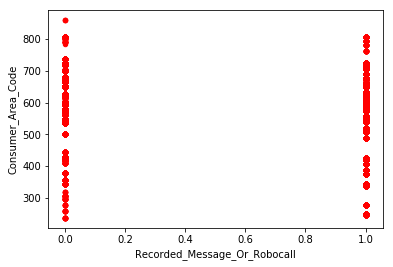

ValueError: scatter requires x column to be numeric

In [15]:
# Scatter plots of different features for test2 data: 

modifiedsubmit.plot(kind='scatter',x='Recorded_Message_Or_Robocall',y='Consumer_Area_Code',color='red')
plt.show()

modifiedsubmit.plot(kind='scatter',x='Consumer_State',y='Consumer_Area_Code',color='blue')
plt.show()


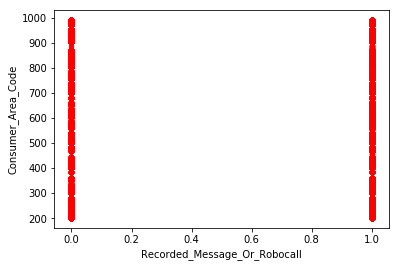

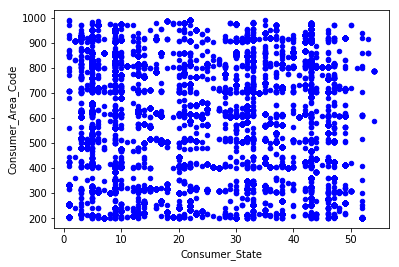

In [16]:
# Scatter plots of different features for training data: 

master_df.plot(kind='scatter',x='Recorded_Message_Or_Robocall',y='Consumer_Area_Code',color='red')
plt.show()

master_df.plot(kind='scatter',x='Consumer_State',y='Consumer_Area_Code',color='blue')
plt.show()


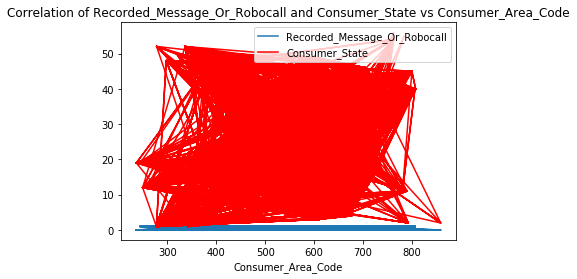

In [17]:
ax = plt.gca()
modifiedsubmit.plot(kind='line',x='Consumer_Area_Code',y='Recorded_Message_Or_Robocall',title='Correlation of Recorded_Message_Or_Robocall and Consumer_State vs Consumer_Area_Code',ax=ax)
modifiedsubmit.plot(kind='line',x='Consumer_Area_Code',y='Consumer_State', color='red', ax=ax)
plt.show()

In [18]:
#OLS Regression Results for Testing2 Data
# Add a constant to our existing dataframe for modeling purposes
modifiedsubmit = sm.add_constant(modifiedsubmit)

est = sm.OLS(modifiedsubmit['Consumer_Area_Code'], 
             submit1_features[['Recorded_Message_Or_Robocall', 'Consumer_State']]
            ).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     Consumer_Area_Code   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                 3.621e+04
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:12:28   Log-Likelihood:            -1.1500e+05
No. Observations:               16472   AIC:                         2.300e+05
Df Residuals:                   16470   BIC:                         2.300e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Recorded_Message

In [20]:
#OLS Regression Results for Training Data
# Add a constant to our existing dataframe for modeling purposes
master_df = sm.add_constant(master_df)

est = sm.OLS(master_df['Consumer_Area_Code'], 
             master_features[['Recorded_Message_Or_Robocall', 'Consumer_State']]
            ).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     Consumer_Area_Code   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                 3.852e+04
Date:                Tue, 26 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:13:52   Log-Likelihood:            -2.1381e+05
No. Observations:               29533   AIC:                         4.276e+05
Df Residuals:                   29531   BIC:                         4.276e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Recorded_Message